# Deep Learning Project

## Automatic Image Tagging for Fashion E-commerce  

Saman Zargarzadeh, Devy Yeap, Tiantian Gu, Tannaz Ebrahimi, Xia-Rong Zhang

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
import os
import gc
import sys
import json
import random
from pathlib import Path
import pandas as pd
import numpy as np

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from reg_utils import sigmoid, relu, plot_decision_boundary, initialize_parameters, load_2D_dataset, predict_dec
from reg_utils import compute_cost, predict, forward_propagation, backward_propagation, update_parameters
import sklearn
import sklearn.datasets
import scipy.io
from testCases import *

Importing the data set as arrays

In [3]:
import numpy as np

# load the text file into an array
train_set_x = np.load('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/train_set_x.npy')
test_set_x = np.load('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/test_set_x.npy')
cv_set_x = np.load('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/cv_set_x.npy')

train_set_y = np.load('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/train_set_y.npy')
test_set_y = np.load('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/test_set_y.npy')
cv_set_y = np.load('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/cv_set_y.npy')


# L Layer Function

In [4]:
from dnn_app_utils_v3 import *

In [5]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [6]:
def predict(parameters, X):

    AL, caches = L_model_forward(X, parameters)
    predictions = np.where(AL > 0.5, 1, 0)
    
    return predictions

# Two Layer with 7 Unit and 4 Unit

In [8]:
n_x = train_set_x.shape[0]
n_x

7938

In [9]:
layers_dims = [n_x, 7, 4, 1] #  4-layer model

Cost after iteration 0: 0.698325
Cost after iteration 100: 0.668278
Cost after iteration 200: 0.656720
Cost after iteration 300: 0.648907
Cost after iteration 400: 0.642308
Cost after iteration 500: 0.636270
Cost after iteration 600: 0.630655
Cost after iteration 700: 0.626262
Cost after iteration 800: 0.627104
Cost after iteration 900: 0.627410
Cost after iteration 1000: 0.625472
Cost after iteration 1100: 0.621088
Cost after iteration 1200: 0.623151
Cost after iteration 1300: 0.616624
Cost after iteration 1400: 0.613860
Cost after iteration 1500: 0.609218
Cost after iteration 1600: 0.609547
Cost after iteration 1700: 0.603064
Cost after iteration 1800: 0.603689
Cost after iteration 1900: 0.602882
Cost after iteration 2000: 0.601737
Cost after iteration 2100: 0.597233
Cost after iteration 2200: 0.594200
Cost after iteration 2300: 0.594070
Cost after iteration 2400: 0.591775


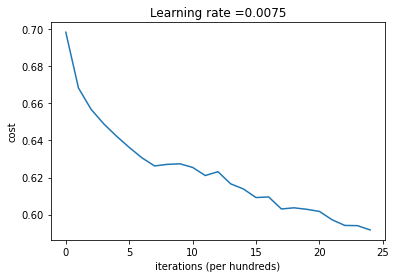

In [78]:
parameters = L_layer_model(train_set_x, train_set_y.reshape(1, -1), 
                           layers_dims, num_iterations = 2500, print_cost = True)

In [79]:
predictions = predict(parameters, train_set_x)
accuracy_train = float((np.dot(train_set_y,predictions.T) + 
                        np.dot(1-train_set_y,1-predictions.T))/float(train_set_y.size)*100)
print("Train Set:", round(accuracy_train,2),"%")

predictions = predict(parameters, test_set_x)
accuracy_test = float((np.dot(test_set_y,predictions.T) + 
                       np.dot(1-test_set_y,1-predictions.T))/float(test_set_y.size)*100)
print("Test Set:", round(accuracy_test,2),"%")

predictions = predict(parameters, cv_set_x)
accuracy_cv = float((np.dot(cv_set_y,predictions.T) + 
                     np.dot(1-cv_set_y,1-predictions.T))/float(cv_set_y.size)*100)
print("CV Set:", round(accuracy_cv,2),"%")


Train Set: 69.06 %
Test Set: 62.25 %
CV Set: 63.12 %


# Regularization

In [33]:
# no need to change this function (it is already implemented for you).
def model(X, Y, learning_rate = 0.0075, num_iterations = 2500, print_cost = True, lambd = 0, keep_prob = 1):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (output size, number of examples)
    learning_rate -- learning rate of the optimization
    num_iterations -- number of iterations of the optimization loop
    print_cost -- If True, print the cost every 10000 iterations
    lambd -- regularization hyperparameter, scalar
    keep_prob - probability of keeping a neuron active during drop-out, scalar.
    
    Returns:
    parameters -- parameters learned by the model. They can then be used to predict.
    """
        
    grads = {}
    costs = []                            # to keep track of the cost
    m = X.shape[1]                        # number of examples
    layers_dims = [X.shape[0], 7, 4, 1]
    
    # Initialize parameters dictionary.
    parameters = initialize_parameters(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        if keep_prob == 1:
            a3, cache = forward_propagation(X, parameters)
        elif keep_prob < 1:
            a3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)
        
        # Cost function
        if lambd == 0:
            cost = compute_cost(a3, Y)
        else:
            cost = compute_cost_with_regularization(a3, Y, parameters, lambd)
            
        # Backward propagation.
        assert(lambd==0 or keep_prob==1)    # it is possible to use both L2 regularization and dropout, 
                                            # but this assignment will only explore one at a time
        if lambd == 0 and keep_prob == 1:
            grads = backward_propagation(X, Y, cache)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 100 iterations
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
    
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,00)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.6918819192122466
Cost after iteration 100: 0.6690096852581046
Cost after iteration 200: 0.6588399615293817
Cost after iteration 300: 0.6520870116984848
Cost after iteration 400: 0.6465981711772715
Cost after iteration 500: 0.641692115942513
Cost after iteration 600: 0.6370414600603379
Cost after iteration 700: 0.6363028849167135
Cost after iteration 800: 0.6381888028736382
Cost after iteration 900: 0.6351004923361337
Cost after iteration 1000: 0.631367676352521
Cost after iteration 1100: 0.6290571242783111
Cost after iteration 1200: 0.6269489315874438
Cost after iteration 1300: 0.6228272638160995
Cost after iteration 1400: 0.6203318567646046
Cost after iteration 1500: 0.6181522984382649
Cost after iteration 1600: 0.6146931462268987
Cost after iteration 1700: 0.6133466829154378
Cost after iteration 1800: 0.6101811546369705
Cost after iteration 1900: 0.6074284097819646
Cost after iteration 2000: 0.6053371019970972
Cost after iteration 2100: 0.6025590014020132
Co

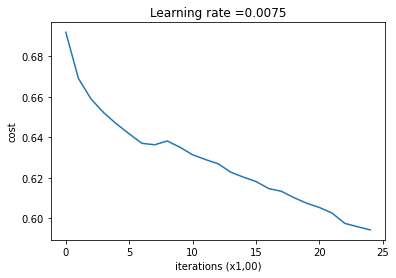

In [34]:
parameters = model(train_set_x, train_set_y.reshape(1, -1))

In [35]:
print ("On the training set:")
predictions_train = predict(train_set_x, train_set_y.reshape(1, -1), parameters)
print ("On the test set:")
predictions_test = predict(test_set_x, test_set_y.reshape(1, -1), parameters)
print ("On the cv set:")
predictions_test = predict(cv_set_x, cv_set_y.reshape(1, -1), parameters)

On the training set:
Accuracy: 0.6784746822254636
On the test set:
Accuracy: 0.625625
On the cv set:
Accuracy: 0.6325


In [36]:
def compute_cost_with_regularization(A3, Y, parameters, lambd):
    """
    Implement the cost function with L2 regularization. See formula (2) above.
    
    Arguments:
    A3 -- post-activation, output of forward propagation, of shape (output size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    parameters -- python dictionary containing parameters of the model
    
    Returns:
    cost - value of the regularized loss function (formula (2))
    """
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    cost = compute_cost(A3, Y) # This gives you the cross-entropy part of the cost
    
    ### START CODE HERE ### (approx. 1 line)
    L2_regularization_cost = (1/m)*(lambd/2)*(np.sum(np.square(W1))+np.sum(np.square(W2))+np.sum(np.square(W3)))
    ### END CODER HERE ###
    
    cost = cost + L2_regularization_cost
    
    return cost

In [37]:
def backward_propagation_with_regularization(X, Y, cache, lambd):
    """
    Implements the backward propagation of our baseline model to which we added an L2 regularization.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation()
    lambd -- regularization hyperparameter, scalar
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    
    dW3 = 1./m * np.dot(dZ3, A2.T) + (lambd/m)*W3
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))

    dW2 = 1./m * np.dot(dZ2, A1.T) + (lambd/m)*W2
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))

    dW1 = 1./m * np.dot(dZ1, X.T) + (lambd/m)*W1
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

Cost after iteration 0: 0.6920072009296656
Cost after iteration 100: 0.6691365740361134
Cost after iteration 200: 0.6589677449035255
Cost after iteration 300: 0.6522175823596784
Cost after iteration 400: 0.6467326800204971
Cost after iteration 500: 0.6418214305448984
Cost after iteration 600: 0.637196182698902
Cost after iteration 700: 0.6353571532513387
Cost after iteration 800: 0.6380527042669036
Cost after iteration 900: 0.6351696625222198
Cost after iteration 1000: 0.632759281358016
Cost after iteration 1100: 0.6286385972368026
Cost after iteration 1200: 0.6250823691471282
Cost after iteration 1300: 0.6219357765987737
Cost after iteration 1400: 0.6194473883247461
Cost after iteration 1500: 0.616651316211304
Cost after iteration 1600: 0.6136347443898907
Cost after iteration 1700: 0.6108325538667779
Cost after iteration 1800: 0.6097578336207127
Cost after iteration 1900: 0.6065964421022231
Cost after iteration 2000: 0.6035516595303498
Cost after iteration 2100: 0.6006047564716692
Cos

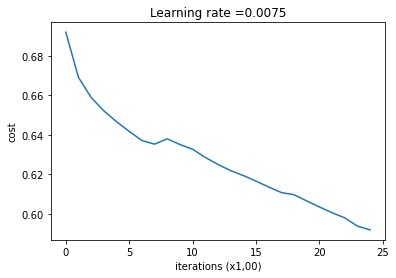

In [38]:
parameters = model(train_set_x, train_set_y.reshape(1, -1), lambd = 0.1)

In [39]:
print ("On the training set:")
predictions_train = predict(train_set_x, train_set_y.reshape(1, -1), parameters)
print ("On the test set:")
predictions_test = predict(test_set_x, test_set_y.reshape(1, -1), parameters)
print ("On the cv set:")
predictions_test = predict(cv_set_x, cv_set_y.reshape(1, -1), parameters)

On the training set:
Accuracy: 0.6857678683058971
On the test set:
Accuracy: 0.62
On the cv set:
Accuracy: 0.61875
